# Algoritmos de optimización - Reto 1

Nombre: Pablo Daniel Maiolo<br>
Github: <br>

## Torres de Hanoi con Divide y vencerás

Resuelve el problema de las [Torres de Hanoi](https://es.wikipedia.org/wiki/Torres_de_Han%C3%B3i) para un número arbitrario de fichas utilizando la técnica de divide y vencerás.

In [23]:
# Torres de Hanoi
def torres_de_hanoi(n, origen, intermedio, destino):
    #print(f'n inicio={n}')
    #print(f'llamada datos: {origen, intermedio, destino}')

    # Salgo del loop recursivo cuando llega a 1
    if n == 1:
        # Una vez que sale de este if se empieza a volver en el ciclo recursivo.
        print(f"Mover disco 1 de {origen} a {destino}")
        return

    # Llamo a la función con el siguiente índice del disco accionando el siguiente movimiento
    torres_de_hanoi(n - 1, origen, destino, intermedio)
    print(f"Mover disco {n} de {origen} a {destino}")

    # Llamo a la función con el siguiente índice del disco accionando el siguiente movimiento
    torres_de_hanoi(n - 1, intermedio, origen, destino)
    #print(f"Saliendo disco {n} de {origen} de {intermedio} a {destino}")

# Ejemplo de 3 discos:
num_discos = 3  # Se puede modificar el valor.
torres_de_hanoi(num_discos, "Palo1", "Palo2", "Palo3")

# También hice el ejercicio iterativo para probar de manera más simple el algoritmo. El costo es mucho menor en el iterativo.

Mover disco 1 de Palo1 a Palo3
Mover disco 2 de Palo1 a Palo2
Mover disco 1 de Palo3 a Palo2
Mover disco 3 de Palo1 a Palo3
Mover disco 1 de Palo2 a Palo1
Mover disco 2 de Palo2 a Palo3
Mover disco 1 de Palo1 a Palo3


## Sucesión de Fibonacci

Cálcula el n-ésimo término de la [Sucesión de Fibonacci](https://es.wikipedia.org/wiki/Sucesi%C3%B3n_de_Fibonacci) mediante un algoritmo recursivo y otro iterativo. Representa gráficamente cómo crece el tiempo de cómputo en función del número de términos para ambos algoritmos.

In [25]:
#Sucesión_de_Fibonacci

import time
import matplotlib.pyplot as plt

# Algoritmo recursivo para calcular el nésimo término de la Sucesión de Fibonacci
def FRecursivo(n):
    #print(f'Paso:{n}')
    if n <= 1:
        #print(f'salida:{n}')
        # Se comienza la liberación para atrás de la recursividad
        return n

    else:
        # Se calcula la suma de los anteriores miembros
        return FRecursivo(n-1) + FRecursivo(n-2)

# Hacemos una prueba con el 5 dígito
resultado = FRecursivo(5)
print(f"resultado:{resultado}")

resultado:5


In [27]:
# Algoritmo iterativo para calcular el n-ésimo término de Fibonacci
def FIterativo(n):
    a, b = 0, 1
    for i in range(n):
        # Le sumamos el siguiente término
        a, b = b, a + b
    return a

# Hacemos la prueba del dígito 5
resultado = FIterativo(5)
# Se imprime el resultado
print(f"resultado: {resultado}")

resultado: 5


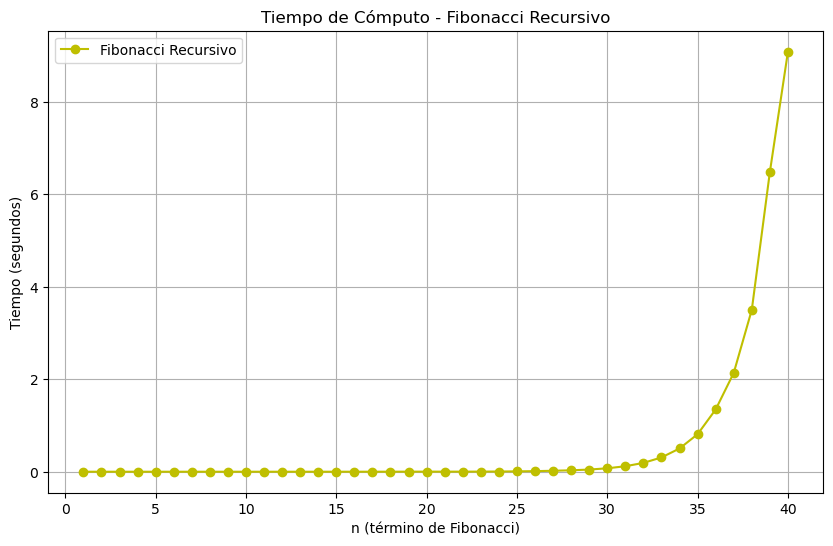

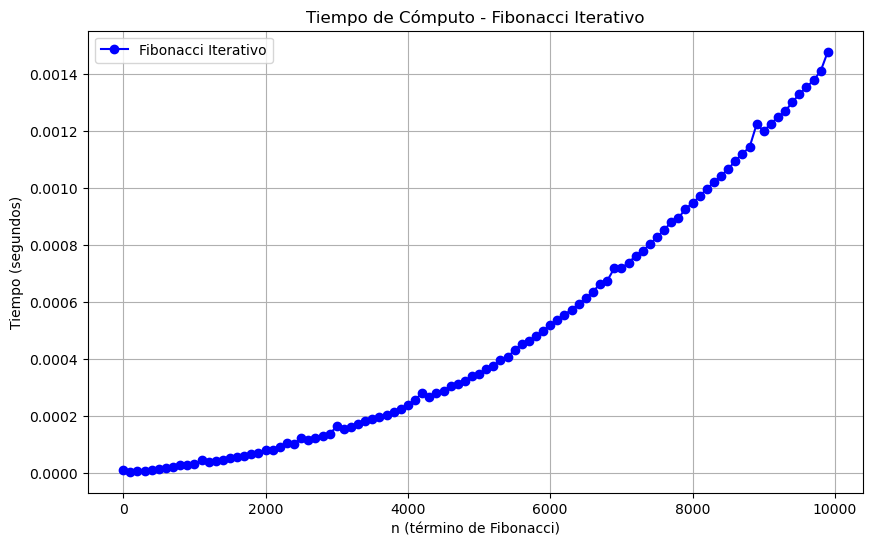

In [50]:

# Medición del tiempo de cómputo para el algoritmo recursivo
# Debido a su complejidad exponencial, usamos valores pequeños. Con 40 tarda unos 25 seg.

import matplotlib.pyplot as plt

nrec = list(range(1, 41))
rtiempos = []

for n in nrec:
    # Tomamos los tiempos antes y después de llamar a la función
    inicio = time.time()
    FRecursivo(n)
    fin = time.time()
    rtiempos.append(fin - inicio)

# Medición del tiempo de cómputo para el algoritmo iterativo
# Se pueden usar valores de n mucho mayores por su eficiencia, la diferencia con el recurso es abismal
nite = list(range(1, 10001, 100))  # Por ejemplo, de 1 a 10,000 en pasos de 100. Cuando en el otro solo usamos 40 valores
itiempos = []

for n in nite:
     # Tomamos los tiempos antes y después de llamar a la función
    inicio = time.time()
    FIterativo(n)
    fin = time.time()
    itiempos.append(fin - inicio)

# Graficar el tiempo de cómputo para el algoritmo recursivo
plt.figure(figsize=(10, 6))
plt.plot(nrec, rtiempos, 'yo-', label='Fibonacci Recursivo')
plt.xlabel('n (término de Fibonacci)')
plt.ylabel('Tiempo (segundos)')
plt.title('Tiempo de Cómputo - Fibonacci Recursivo')
plt.legend()
plt.grid(True)
plt.show()

# Graficar el tiempo de cómputo para el algoritmo iterativo
plt.figure(figsize=(10, 6))
plt.plot(nite, itiempos, 'bo-', label='Fibonacci Iterativo')
plt.xlabel('n (término de Fibonacci)')
plt.ylabel('Tiempo (segundos)')
plt.title('Tiempo de Cómputo - Fibonacci Iterativo')
plt.legend()
plt.grid(True)
plt.show()

# Se ve claramente la diferencia de cómputo exponencial en el caso recursivo contra el otro mucho más lineal creciente.
# Para casos complejos la recursividad usa mucho más recursos.

## Devolución de cambio por técnica voraz

Resuelve el [Problema del Cambio de Moneda](https://es.wikipedia.org/wiki/Problema_de_cambio_de_monedas) utilizando una técnica voraz.

In [56]:
# Problema del cambio de moneda
def cambio_moneda(monedas, cantidad):
    monedas.sort(reverse=True) # ordeno para que el algoritmo devuelva primero la más grande
    cambio = [] #guardo el cambio
    for moneda in monedas:
        while cantidad >= moneda:
            cambio.append(moneda)
            cantidad -= moneda # Descuento la ya entregada
    return cambio

# Definimos las monedas posibles
monedas_mercado = [50,25, 10, 5, 1]

# Hacemos un ejemplo de devolución de cambio
cambio_moneda(monedas_mercado, 77)


[50, 25, 1, 1]

## N-Reinas por técnica de vuelta atrás
Resuelve el [Problema de las N-Reinas](https://es.wikipedia.org/wiki/Problema_de_las_ocho_reinas) en un tablero de dimensión N mediante la técnica de la vuelta atrás (backtraking).

In [60]:
import numpy as np

# definimos función para resolver problema de n-reinas
def resolver_n_reinas(n):
    tablero = np.zeros((n, n), dtype=int)  # Crear tablero NxN inicializado con ceros

    # Colocar la reina en la posición correcta
    if colocar_reina(tablero, 0, n):
        # imprimimos la reina
        imprimir_tablero(tablero)
        return True
    else:
        # No se pudo encontrar una posición
        print("No se encontró una solución")
        return False

def colocar_reina(tablero, fila, n):
    # Coloca reinas usando backtracking. se explora solución sino retrocede
    if fila == n:
        return True  # Caso base: todas las reinas están colocadas

    for col in range(n):
        if es_seguro(tablero, fila, col, n):
            tablero[fila, col] = 1  # Coloca la reina
            if colocar_reina(tablero, fila + 1, n):  # Pasamos a la siguiente fila
                return True
            # Backtracking: quita la reina si no funciona
            tablero[fila, col] = 0

    return False

def es_seguro(tablero, fila, col, n):
    # Verifica si es seguro colocar una reina en (fila, col).
    # Verificar columna arriba
    if np.any(tablero[:fila, col] == 1):
        return False

    # Verificar diagonal superior izquierda
    for i, j in zip(range(fila-1, -1, -1), range(col-1, -1, -1)):
        if tablero[i, j] == 1:
            return False

    # Verificar diagonal superior derecha
    for i, j in zip(range(fila-1, -1, -1), range(col+1, n)):
        if tablero[i, j] == 1:
            return False

    return True

def imprimir_tablero(tablero):
    # Imprime el tablero fila por fila.
    for fila in tablero:
        fila_str = []
        for x in fila:
            if x == 1:
                fila_str.append("Q")  # Representa una reina
            else:
                fila_str.append(".")  # Representa una casilla vacía
        print(" ".join(fila_str))  # Une los elementos de la fila en una línea
    print()

# Ejecutamos el algoritmo
n = 8
print(f"Resolviendo N-Reinas para N = {n}:")
resolver_n_reinas(n)

Resolviendo N-Reinas para N = 8:
Q . . . . . . .
. . . . Q . . .
. . . . . . . Q
. . . . . Q . .
. . Q . . . . .
. . . . . . Q .
. Q . . . . . .
. . . Q . . . .



True